In [3]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier
# 자동으로 데이터 셔플 후 나눠주는 모듈
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import requests
import glob, os.path, re

# maplotlib.rcParams['font.family'] = 'AppleGothic Gothic   # Mac 사용자
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = '10'  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

파일 확인

In [63]:
# 각 파일 처리 : 함수 이용
def load_files(path):
    freqs = []
    results = []
    file_list = glob.glob(path)
    for fname in file_list:     # 파일개수 : 20번 실행
        name = os.path.basename(fname)  # 파일 1번, 파일 2번
        lang = name.split('-')[0]  # en,fr,id,tl..
        # 결과값 리스트 저장
        results.append(lang)
        
        with open(fname,'r',encoding='utf-8') as f:       # fname : '../lang/train\\en-1.txt', name : en-1.txt
            text = f.read()
            
        text = text.lower()  # 모든 문자를 소문자로
        cnt = [0 for n in range(0,26)]  # a~z 카운트 수를 0으로 채움
        code_a = ord('a')  # 97
        code_z = ord('z')  # 122
        
        # a-z 사이의 문자만 저장
        for ch in text:
            n = ord(ch)
            if code_a <= n <= code_z:
                cnt[n-code_a] += 1   # b: 98-97 = 1 -> 1의 자리에 1증가
                
        # 정규화 작업 :  각 피쳐마다 비율을 일정하게 맞춤
        total = sum(cnt)
        # 데이터의 값을 0-1 사이의 값으로 변환
        freq = list(map(lambda n : n/total,cnt))
        
        # data 값을 저장
        freqs.append(freq)
        
        
        
    return {'freqs': freqs, 'results': results}
         

In [65]:
path = '../lang/train/*.txt'
path2 = '../lang/test/*.txt'

# 함수 호출
data = load_files(path)   # 함수호출 - 20개의 train 데이터를 가져옴
test = load_files(path2)  # 함수호출 - 8개의 test 데이터를 가져옴
data['freqs'][0]
test['freqs'][0]
data['results'][0]


'en'

#### 데이터 전처리 - train 세트, test 세트 생성
머신러닝순서

1. 데이터 전처리

2. 데이터 학습시키기 : fit

3. 데이터 예측하기 : predict

4. 정답률 출력하기 : score

In [66]:
# 데이터 학습시키기
clf = svm.SVC()
clf.fit(data['freqs'],data['results'])

# 데이터 예측하기
predict = clf.predict(test['freqs'])
print("결과값 : ", predict)

결과값 :  ['en' 'en' 'fr' 'fr' 'id' 'id' 'tl' 'tl']


In [67]:
# 정답률 출력하기
score = clf.score(test['freqs'],test['results'])
print("정답률 : ", score)

정답률 :  1.0


In [69]:
c1_report = metrics.classification_report(test['results'],predict)
print(c1_report)

              precision    recall  f1-score   support

          en       1.00      1.00      1.00         2
          fr       1.00      1.00      1.00         2
          id       1.00      1.00      1.00         2
          tl       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [70]:
data['freqs'][1][:3]

[0.08417789436031954, 0.019911768212710148, 0.030404196971503518]

array([<Axes: title={'center': 'en'}>, <Axes: title={'center': 'fr'}>,
       <Axes: title={'center': 'id'}>, <Axes: title={'center': 'tl'}>],
      dtype=object)

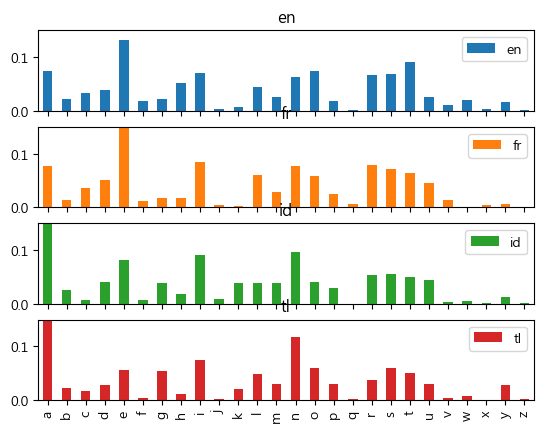

In [72]:
# 그래프 그리기
lang_dic = {}
for i, result in enumerate(data['results']):
    fq = data['freqs'][i]  # data 부분을 가지고 옴.
    if not (result in lang_dic):
        lang_dic[result] = fq
    for idx, v in enumerate(fq):
        lang_dic[result][idx] = (lang_dic[result][idx]+v) / 2
        
# x축의 눈금을 생성
asc_list = [chr(n) for n in range(97,122+1)]    # 97: a, 122: z
df = pd.DataFrame(lang_dic, index=asc_list)
df.plot(kind='bar',subplots=True, ylim=(0,0.15))

In [75]:
df.columns

Index(['en', 'fr', 'id', 'tl'], dtype='object')

In [76]:
df

,en,fr,id,tl
a,0.073792,0.076364,0.174445,0.200662
b,0.021171,0.013063,0.025219,0.022221
c,0.032744,0.036548,0.006991,0.016142
d,0.038673,0.050288,0.040997,0.028151
e,0.132650,0.148401,0.080607,0.056933
f,0.018442,0.012125,0.007259,0.004553
g,0.022573,0.016470,0.039173,0.053827
h,0.051041,0.016609,0.018819,0.011328
i,0.069741,0.085023,0.091622,0.075240
j,0.002658,0.003776,0.007924,0.002039


(0.0, 0.15)

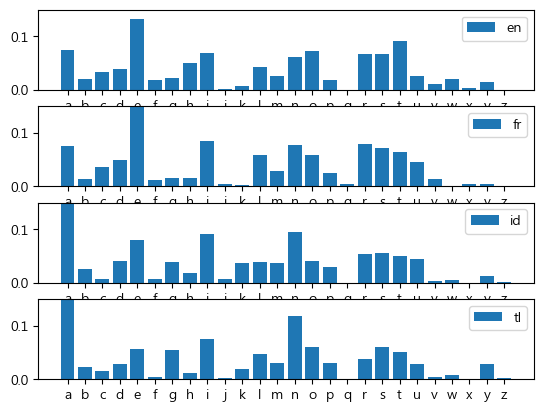

In [79]:
fig, axs = plt.subplots(4)
axs[0].bar(df.index, df['en'],label=df.columns[0])
axs[0].legend()
axs[0].set_ylim(0,0.15)

axs[1].bar(df.index, df['fr'],label=df.columns[1])
axs[1].legend()
axs[1].set_ylim(0,0.15)

axs[2].bar(df.index, df['id'],label=df.columns[2])
axs[2].legend()
axs[2].set_ylim(0,0.15)

axs[3].bar(df.index, df['tl'],label=df.columns[3])
axs[3].legend()
axs[3].set_ylim(0,0.15)

In [34]:
# 아스키 코드 : 문자를 숫자 형태로표시, A: 65, a: 97, 숫자 0: 48
chr(65+32)
chr(97-32)
chr(50-48)  # 숫자 2가 아닌 문자 2가 출력됨, 숫자 2는 chr(50)

'\x02'

In [36]:
np.zeros(26)
np.ones(26)
[0 for n in range(0,20)]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [40]:
# ord : 문자를 넣어주면, 숫자형태로 변환해줌
ord('a')

97

In [62]:
# 데이터를 가져와서 출력해보는 것을 먼저!
# name = os.path.basename(file_train[0])
# name
# lang = name.split('-')
# print(lang[0])

# cnt = [ 0 for n in range(0,26)]

# # 1개 파일 내용 읽어오기
# with open('../lang/train/'+name, 'r', encoding='utf-8') as f:
#     # print(f.read())
#     text = f.read()
#     text = text.lower() # 모두 소문자로 치환
#     # 문자 개수 세기
#     # 영문자가 26개 있음. 배열 26개짜리를 1개 생성, 이후 알파벳 당 개수를 카운드해서 해당 자리값에 넣어줌
    
#     # 1개씩 문자를 읽어와서 26개의 배열에서 1씩 추가
#     code_a = ord('a')
#     code_z = ord('z')
#     for ch in text: 
#         n = ord(ch)  # 텍스트 내 알파벳을 숫자형태로 바꿔줌
#         if code_a <= n <= code_z:  # a~z 사이의 문자이면
#             # 리스트에 저장
#             cnt[n-code_a] += 1   # 해당되는 위치에 1을 증가  # 완전 신기해욧
        
#     # 정규화
#     total = sum(cnt)
    
#     # freq의 배열의 값을 total로 나눠서 다시 리스트를 만들음.
#     freq = []
#     for i in cnt:
#         freq.append((i/total))
        
#     freq = list(map(lambda n : n/total,cnt))
        
        
# print(freq)

In [61]:
# name = os.path.basename(file_train[0])
# 폴더의 모든 파일의 이름을 가져옴

# data = []
# results = []

# for f_name in file_train:
#     name = os.path.basename(f_name)
#     # print(name)
    
#     # 데이터 가져오기
    
    
    
#     # str split을 사용해서 앞에 있는 2글자만 분리해서 출력하시오
#     lang = name.split('-')    # 리스트 형태로 분리된다
#     # print(lang)
#     results.append(lang[0])
    
# results